In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
frutas = pd.read_excel("./data/dados_frutas.xlsx")

In [3]:
frutas

,Arredondada,Suculenta,Vermelha,Doce,Fruta
0,0,1,1,1,Morango
1,1,0,0,0,Limão
2,1,1,0,1,Pera
3,0,0,0,1,Banana
4,1,1,1,1,Cereja
5,1,1,1,0,Tomate
6,1,1,1,1,Maçã


### Árvore de decisão

In [12]:
# Modelo
arvore = tree.DecisionTreeClassifier(random_state=42)

# Variavel dependente (resposta)
y = frutas['Fruta']

# Variaveis independentes (carcteristicas)
caracteristicas = ['Arredondada', 'Suculenta', 'Vermelha', 'Doce']
X = frutas[caracteristicas]

### OBS. Obviamente o tamanho de X e de y devem ser iguais (mesmos elementos)

In [13]:
# Ensinar a máquina (ajustar o modelo - reconhecimento de padrões)
arvore.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [14]:
# Predição
arvore.predict([[1, 1, 1, 1]])

C:\Users\clebe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Cereja'], dtype=object)

[Text(0.4090909090909091, 0.875, 'Arredondada <= 0.5\ngini = 0.857\nsamples = 7\nvalue = [1, 1, 1, 1, 1, 1, 1]\nclass = Banana'),
 Text(0.18181818181818182, 0.625, 'Suculenta <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 0, 1, 0, 0]\nclass = Banana'),
 Text(0.29545454545454547, 0.75, 'True  '),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]\nclass = Banana'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]\nclass = Morango'),
 Text(0.6363636363636364, 0.625, 'Vermelha <= 0.5\ngini = 0.8\nsamples = 5\nvalue = [0, 1, 1, 1, 0, 1, 1]\nclass = Cereja'),
 Text(0.5227272727272727, 0.75, '  False'),
 Text(0.45454545454545453, 0.375, 'Suculenta <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 1, 0]\nclass = Limão'),
 Text(0.36363636363636365, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]\nclass = Limão'),
 Text(0.5454545454545454, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0

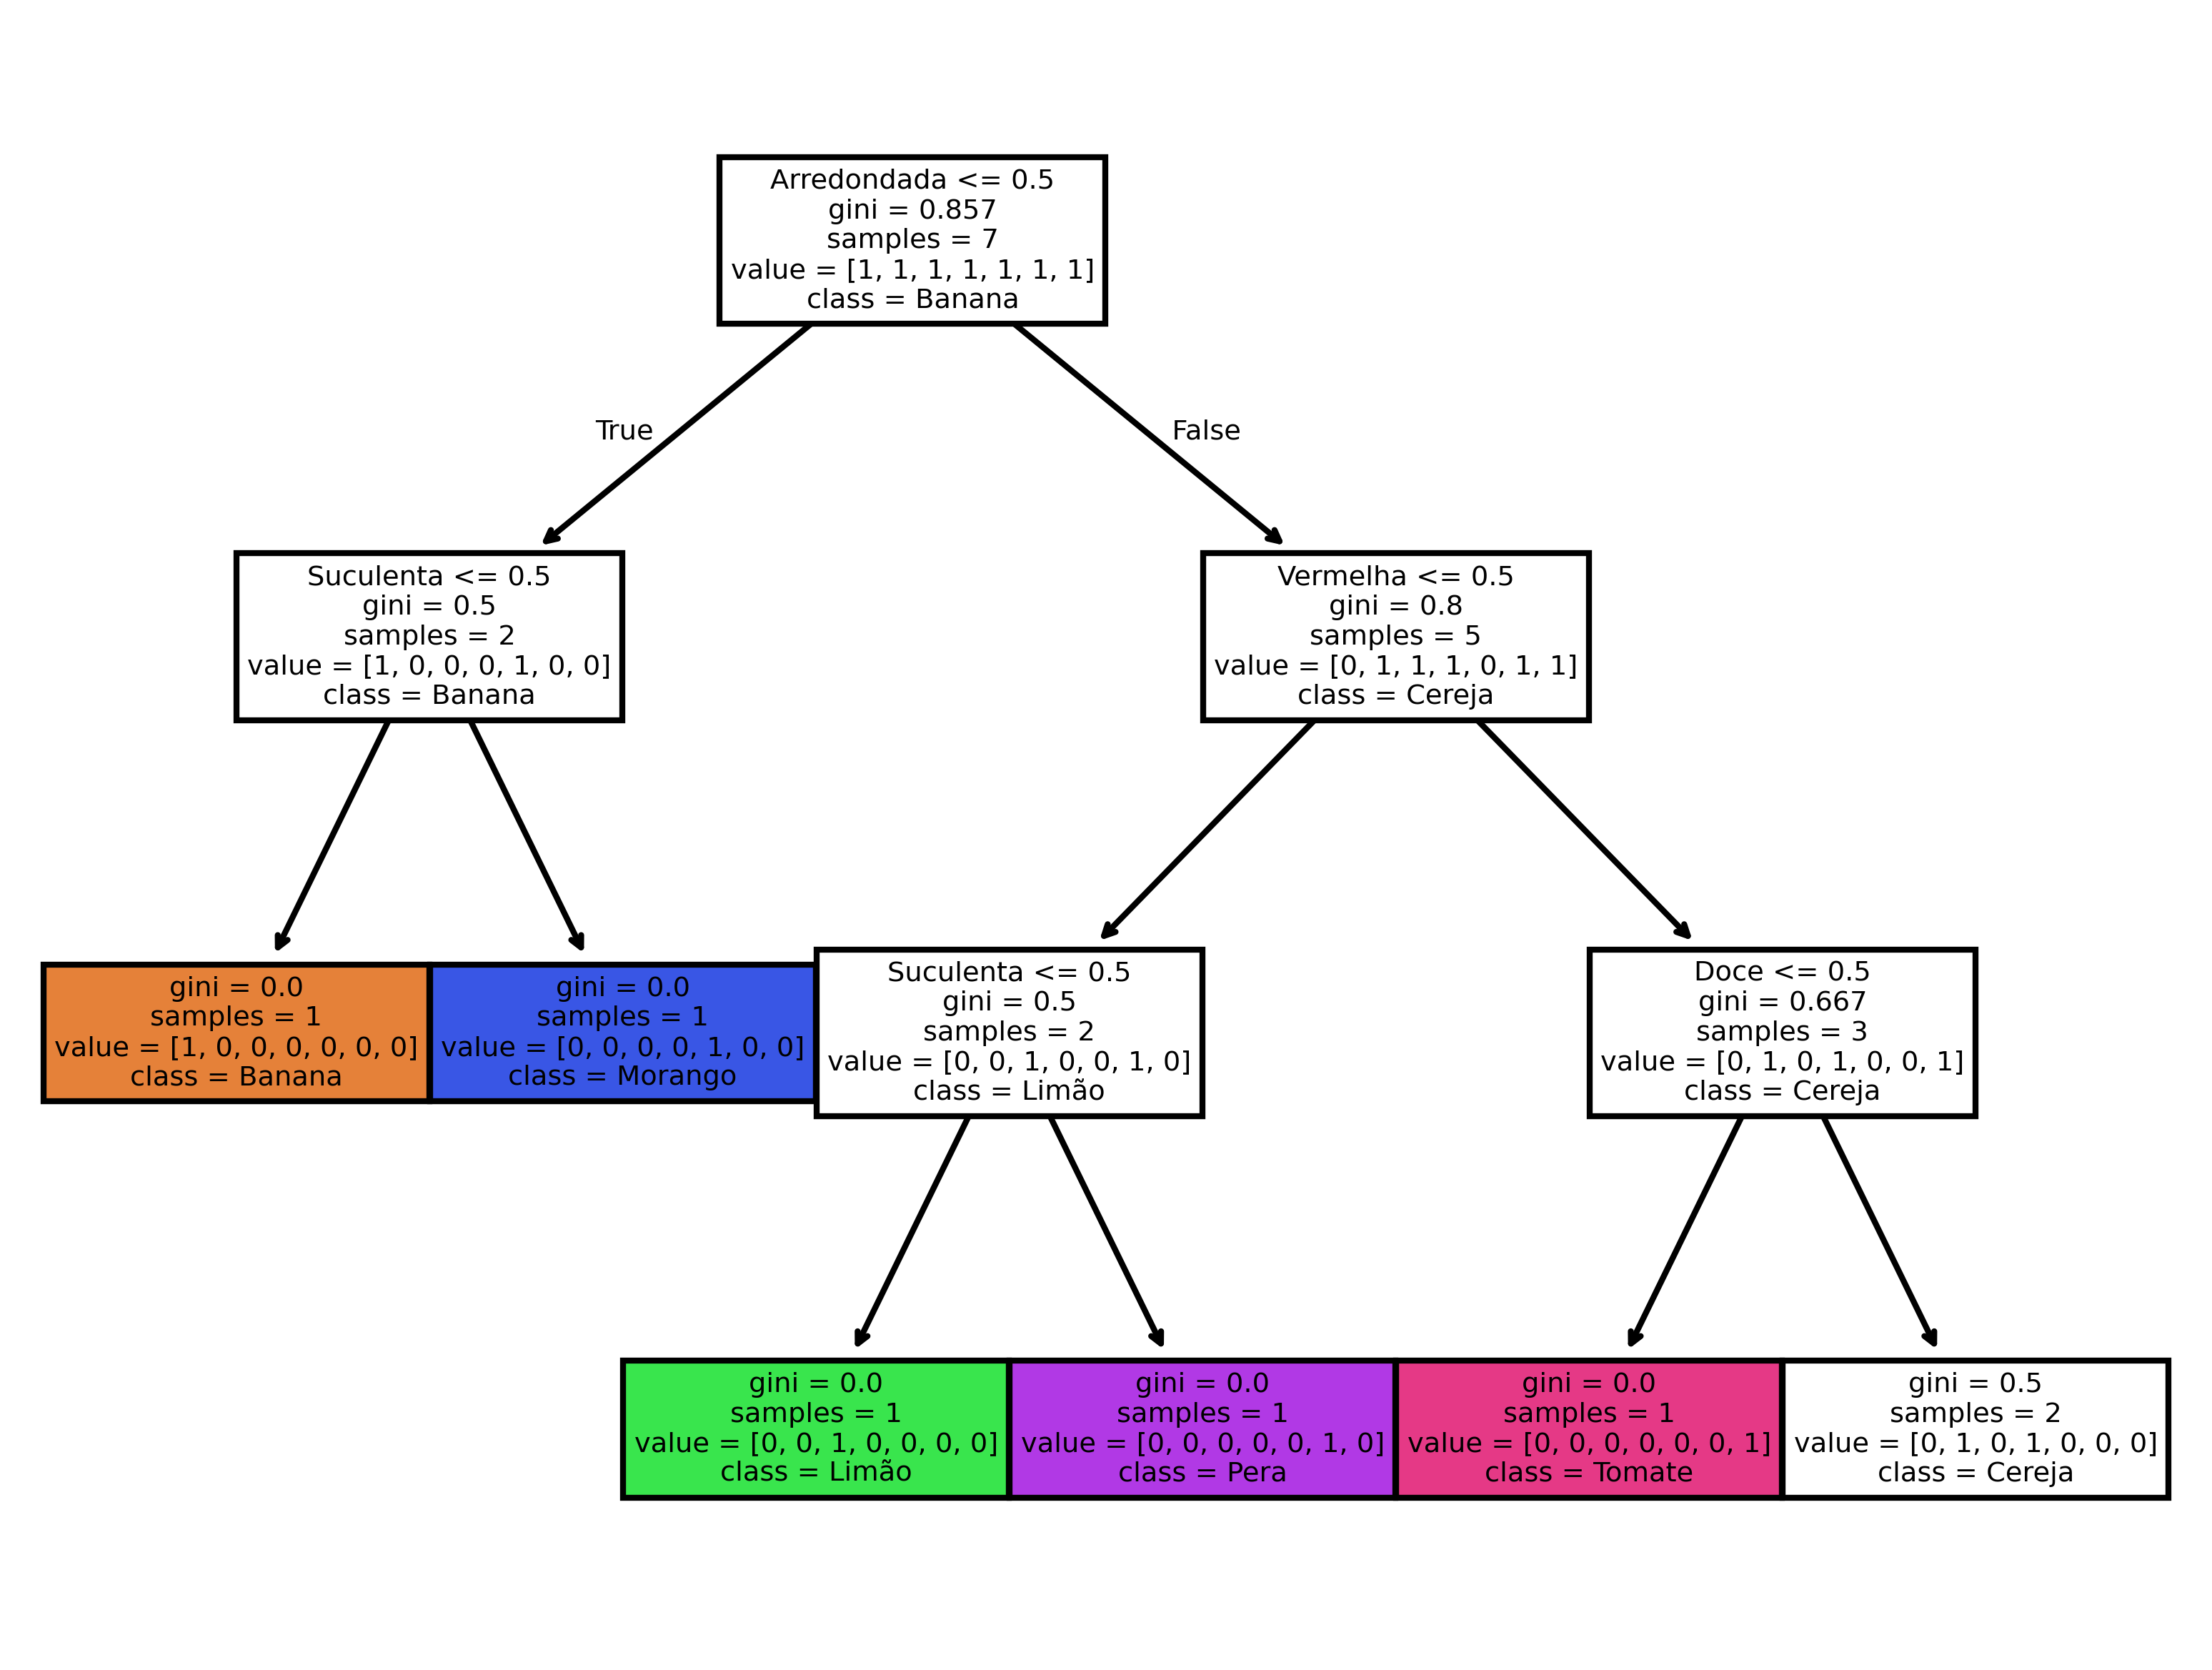

In [20]:
# Desenhando a árvore
plt.figure(dpi=600)

tree.plot_tree(arvore, 
               feature_names=caracteristicas,
               class_names=sorted(y.unique().astype(str)),
               filled=True)

OBS. Values são as classes (frutas)

São 7 frutas, 5 delas ele conseguiu separar (coloridas) e 2 delas ele não conseguiu

In [31]:
# Visualizando as probabilidades de cada uma das classes
proba = arvore.predict_proba([[1,1,1,1]])[0]

pd.Series(proba, index=arvore.classes_)

C:\Users\clebe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Banana     0.0
Cereja     0.5
Limão      0.0
Maçã       0.5
Morango    0.0
Pera       0.0
Tomate     0.0
dtype: float64